Importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from scipy import stats

Data loading

In [3]:
books = pd.read_csv('data/books.csv')
ratings = pd.read_csv('data/ratings.csv')
book_tags = pd.read_csv('data/book_tags.csv')
tags = pd.read_csv('data/tags.csv')

In [4]:
books.head(5)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [5]:
ratings.head(5)

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [6]:
book_tags.head(5)

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [7]:
tags.head(5)

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


dimensions of data

In [8]:
print(books.shape)
print(tags.shape)
print(book_tags.shape)
print(ratings.shape)

(10000, 23)
(34252, 2)
(999912, 3)
(981756, 3)


In [9]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.754393e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428246e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780000e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780000e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780000e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790000e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

the data for isbn, isbn13, original_publication_year, original_title, language_code is missing (not equal to 10000)
so we have to delete those records, which is missing

### Features

- **book_id**: A unique Identification number for each book. 

- **best_book_id**: generally point to the most popular edition of a given book.

- **work_id**: refers to the book in the abstract sense.

- **books_count**: number of editions.

- **isbn**: Another unique number to identify the book, the International Standard Book Number.

- **isbn13**: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.

- **authors**: Names of the authors of the book. Multiple authors are delimited with `,`.

- **original_publication_year**: year when the book was first published.

- **title**: The name under which the book was published.

- **language_code**: Helps understand what is the primary language of the book. For instance, eng is standard for English.

- **average_rating**: The average rating of the book received in total.

- **ratings_count**: Total number of ratings the book received.

- **work_text_reviews_count**: Total number of written text reviews the book received.

- **ratings_1**: Total number of ratings of 1.

- **ratings_2**: Total number of ratings of 2.

- **ratings_3**: Total number of ratings of 3.

- **ratings_4**: Total number of ratings of 4.

- **ratings_5**: Total number of ratings of 5.

In [11]:
books = books.dropna()
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [12]:
books.info

<bound method DataFrame.info of         id  book_id  best_book_id   work_id  books_count        isbn  \
0        1  2767052       2767052   2792775          272   439023483   
1        2        3             3   4640799          491   439554934   
2        3    41865         41865   3212258          226   316015849   
3        4     2657          2657   3275794          487    61120081   
4        5     4671          4671    245494         1356   743273567   
...    ...      ...           ...       ...          ...         ...   
9994  9995    15613         15613   2764239          199  1416523723   
9995  9996  7130616       7130616   7392860           19   441019455   
9996  9997   208324        208324   1084709           19  067973371X   
9997  9998    77431         77431   2393986           60  039330762X   
9998  9999  8565083       8565083  13433613            7    61711527   

            isbn13                      authors  original_publication_year  \
0     9.780000e+12       

removing duplicates

In [13]:
books = books[books.duplicated(keep=False)==False]


In [14]:
books['average_rating'].astype(bool).sum()

7860

In [15]:
books

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780000e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,9995,15613,15613,2764239,199,1416523723,9.780000e+12,Herman Melville,1924.0,"Billy Budd, Sailor",...,10866,12110,681,1478,2225,3805,2985,1617,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9995,9996,7130616,7130616,7392860,19,441019455,9.780000e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780000e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780000e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...


correletion heatmap

<AxesSubplot:>

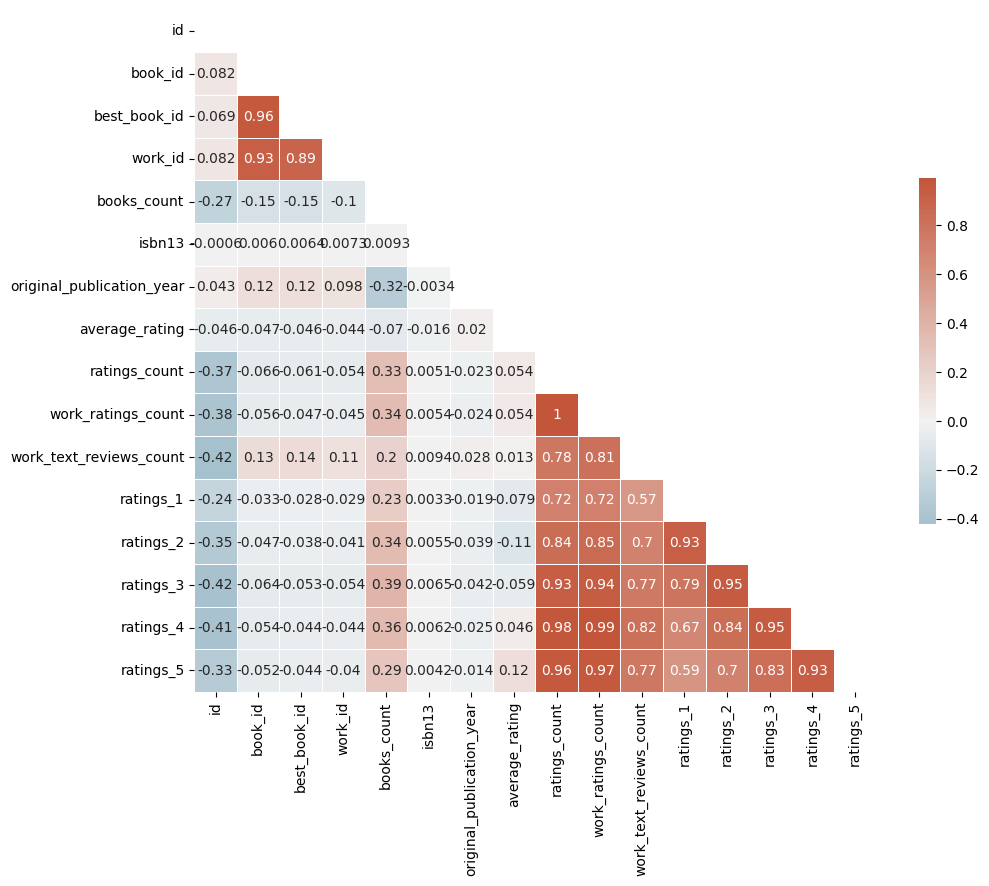

In [16]:
corr = books.corr()
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, annot= True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [17]:
col = ['title','authors','average_rating','ratings_count','work_text_reviews_count']

In [18]:
books = books[col]

In [19]:
books

,title,authors,average_rating,ratings_count,work_text_reviews_count
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4.34,4780653,155254
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4.44,4602479,75867
2,"Twilight (Twilight, #1)",Stephenie Meyer,3.57,3866839,95009
3,To Kill a Mockingbird,Harper Lee,4.25,3198671,72586
4,The Great Gatsby,F. Scott Fitzgerald,3.89,2683664,51992
...,...,...,...,...,...
9994,"Billy Budd, Sailor",Herman Melville,3.09,10866,681
9995,"Bayou Moon (The Edge, #2)",Ilona Andrews,4.09,17204,1180
9996,"Means of Ascent (The Years of Lyndon Johnson, #2)",Robert A. Caro,4.25,12582,395
9997,The Mauritius Command,Patrick O'Brian,4.35,9421,374


top rated books

In [20]:
book_sorted_ratings = books.sort_values(by="average_rating", ascending = False)
book_sorted_ratings.head(10)

,title,authors,average_rating,ratings_count,work_text_reviews_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900,861
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572,7261
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081,731
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351,264
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766,149
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050,6508
6589,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,4.73,16087,425
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597,325
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618,882
9565,Attack of the Deranged Mutant Killer Monster S...,Bill Watterson,4.72,9713,233


top popular books

In [21]:
book_sorted_popularity = books.sort_values(by="ratings_count", ascending = False)
book_sorted_ratings.head(10)

,title,authors,average_rating,ratings_count,work_text_reviews_count
3627,The Complete Calvin and Hobbes,Bill Watterson,4.82,28900,861
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,4.77,73572,7261
8853,Mark of the Lion Trilogy,Francine Rivers,4.76,9081,731
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,4.75,22351,264
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,4.74,16766,149
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,4.74,190050,6508
6589,The Authoritative Calvin and Hobbes: A Calvin ...,Bill Watterson,4.73,16087,425
6919,The Indispensable Calvin and Hobbes,Bill Watterson,4.73,14597,325
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,4.73,24618,882
9565,Attack of the Deranged Mutant Killer Monster S...,Bill Watterson,4.72,9713,233


Recommender system:
- Content based (genres) - cosine similarity (ratings, title, authors)
- Collaborative filtering - KNN (user, ratings)